# LogView: A Demonstration on the Road Traffic Fine Management Event Log #

#### Introduction ####
For our evaluation, we conducted an extensive analysis using the Road Traffic Fine Management (RTFM) event log. The log records data about the process of managing and handling road traffic fines by a local police force in Italy and has been used often in process mining literature.

#### Process Description #### 
The RTFM log contains 561,470 events grouped into 150,370 cases recorded between January 2000 and June 2013, including 11 different activities and 12 data attributes.
Each case begins with a **Create Fine** event, which specifies the fine amount and other attributes. Offenders have the option to pay the fine at any time, as indicated by a **Payment** event and its _PaymentAmount_ attribute, which captures the amount paid in one transaction. A _TotalPaymentAmount_ attribute also tracks the cumulative amount paid. A **Send Fine** event triggers a notification letter to the offender, whose receipt is documented by an **Insert Fine Notification** event, followed by a possible ***Add Penalty** event, which updates the amount to be paid. Sending the letter incurs postage costs, captured by the _expense_ attribute. Finally, a **Send for Credit Collection** event sends unpaid cases to a collection agency. Offenders have the option to appeal against the fine to a prefecture or judge. If the fine is overturned this is recorded in the _dismissal_ attribute.

#### Data #### 
The event log is already provided in the dataset folder.\
More details about the event log can be found [here](https://link.springer.com/article/10.1007/s00607-015-0441-1#Sec8).\
The raw event log files can also be downloaded [here](https://data.4tu.nl/articles/dataset/Road_Traffic_Fine_Management_Process/12683249?file=24018146).

## Reading the event log file ##

In [1]:
import pandas as pd
import pm4py

CASE_ID_COL = 'Case ID'
TIMESTAMP_COL = 'Complete Timestamp'
ACTIVITY_COL = 'Activity'

# Read event log
path_to_log = "./dataset/Road_Traffic_Fine_Management_Process.csv"
df = pd.read_csv(path_to_log, dtype={'Resource': str, 'matricola': str}, parse_dates=[TIMESTAMP_COL])
df = df.sort_values([CASE_ID_COL, TIMESTAMP_COL], ignore_index=True)
log = pm4py.format_dataframe(df, case_id=CASE_ID_COL, activity_key=ACTIVITY_COL, timestamp_key=TIMESTAMP_COL)

# Create a log view object to interact with the framework
from logview.utils import LogViewBuilder
log_view = LogViewBuilder.build_log_view(log)

In [2]:
# View the read log for debug
log.head(30)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,A1,Create Fine,561,2006-07-24 00:00:00+00:00,Variant 3,3,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A1,Create Fine,2006-07-24 00:00:00+00:00,0,0
1,A1,Send Fine,NaN,2006-12-05 00:00:00+00:00,Variant 3,3,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A1,Send Fine,2006-12-05 00:00:00+00:00,1,0
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
7,A10000,Create Fine,561,2007-03-09 00:00:00+00:00,Variant 4,4,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10000,Create Fine,2007-03-09 00:00:00+00:00,7,2
8,A10000,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10000,Send Fine,2007-07-17 00:00:00+00:00,8,2
9,A10000,Insert Fine Notification,NaN,2007-08-02 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+00:00,9,2


## Exploring Unpaid Cases ##
**Goal**: Find scenarios in which traffic fines are not fully paid.\
Our Initial Hypothesis: Unpaid cases are those where there is no **Payment** activity.

_This is our initial hypothesis, which is intentionally not precise as we are in exploratory settings._

In [3]:
from logview.predicate import *

# Run a query to find all cases that do not include activity Payment: this is assumed to indicate unpaid activities.
query_no_p = Query('unpaid', [NotEqToConstant('Activity', 'Payment')])
rs_no_p, complement_no_p = log_view.evaluate_query('rs_unpaid', log, query_no_p)

rs_no_p.head(10)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,A1,Create Fine,561,2006-07-24 00:00:00+00:00,Variant 3,3,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A1,Create Fine,2006-07-24 00:00:00+00:00,0,0
1,A1,Send Fine,NaN,2006-12-05 00:00:00+00:00,Variant 3,3,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A1,Send Fine,2006-12-05 00:00:00+00:00,1,0
2,A100,Create Fine,561,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
12,A10001,Create Fine,537,2007-03-19 00:00:00+00:00,Variant 8,8,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10001,Create Fine,2007-03-19 00:00:00+00:00,12,3
13,A10001,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 8,8,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10001,Send Fine,2007-07-17 00:00:00+00:00,13,3
14,A10001,Insert Fine Notification,NaN,2007-07-25 00:00:00+00:00,Variant 8,8,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10001,Insert Fine Notification,2007-07-25 00:00:00+00:00,14,3


We check that our query has been added to the registry

In [4]:
_ = log_view.get_summary()

+----+--------------------+---------+--------------+----------+
|    | source_log         | query   | result_set   | labels   |
|----+--------------------+---------+--------------+----------|
|  0 | initial_source_log | unpaid  | rs_unpaid    | []       |
+----+--------------------+---------+--------------+----------+
+----+---------+---------------------------------+
|    | query   | predicates                      |
|----+---------+---------------------------------|
|  0 | unpaid  | (Activity not in { 'Payment' }) |
+----+---------+---------------------------------+


We then characterize the result using our _Result Set Characterizer_. We're interested in looking into cardinality, to see how much we filtered out and a few examples.

In [5]:
_ = log_view.characterize_result_set_with_reference_log('rs_unpaid', log, characterizer_name='set-cardinality')
_ = log_view.characterize_result_set_with_reference_log('rs_unpaid', log, characterizer_name='random-example-retriever')

Number of case_id in rs_unpaid: 80655
Number of case_id in initial_source_log: 150370
Sample from initial_source_log
+--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity    |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense |   lastSent | lifecycle:transition   |   matricola |   notificationType |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name   | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+-------------+------------+---------------------------+-----------+----

We see that the number of unpaid cases is quite high, covering a bit more than half of the cases.\
From the summary, we see that the attribute _TotalPaymentAmount_ consistently equals to 0 across all entries in the summary statistics, confirming that the lack of a _Payment_ activity correlates with a _TotalPaymentAmount_ = 0. This can be explained by the fact that _TotalPaymentAmount_ is an event attribute of _Payment_.\

But did we include already all the cases with _totalPaymentAmount = 0_ with our query "unpaid"?

We decide to check how many of the cases we selected are actually not paid, i.e., they have a totalPaymentAmount = 0 in the result set and compare it with the original log as a reference.\
To do so, we define the following property 'isNotPaid' as a predicate and characterize our result set based on the extent to which this property holds on it.

In [6]:
from logview.interfaces import Predicate

class isNotPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        # Get the maximum value of the amount paid by the offender
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_totalPaymentAmount], axis=1)

        # A fine is not paid if max(totalPaymentAmount) = 0
        unpaid_fines = to_check[to_check['totalPaymentAmount'] <= 0]
        case_id_to_keep = unpaid_fines['totalPaymentAmount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(totalPaymentAmount) <= 0'

We find out that our initial query was pretty accurate: apparently there is only one case that has activity _Payment_ and results in a _TotalPaymentAmount_ of 0.\
This case can be easily retrieved from the complement set of our our result set.

We first label this result set as the set of unpaid cases, leaving out the case with initial amount = 0.0.

In [7]:
log_view.label_result_set(rs_no_p, 'unpaid')
_ = log_view.get_summary()

+----+--------------------+---------+--------------+------------+
|    | source_log         | query   | result_set   | labels     |
|----+--------------------+---------+--------------+------------|
|  0 | initial_source_log | unpaid  | rs_unpaid    | ['unpaid'] |
+----+--------------------+---------+--------------+------------+
+----+---------+---------------------------------+
|    | query   | predicates                      |
|----+---------+---------------------------------|
|  0 | unpaid  | (Activity not in { 'Payment' }) |
+----+---------+---------------------------------+


In [8]:
from logview.result_set_characterizer.properties_evaluator import PropertiesEvaluator

# We instantiate the property evaluator plugin with our new property using our extension mechanisms and the dedicated "attach" method.
_ = log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([isNotPaid()]))

# We characterize our result set and its complement with property 'isNotPaid' to see whether we left something out
_ = log_view.characterize_result_set_with_reference_log('rs_unpaid', complement_no_p, characterizer_name='property_evaluator')

+------------------------------+--------------+------------------------+
|                              | rs_unpaid    | complement_rs_unpaid   |
|------------------------------+--------------+------------------------|
| max(totalPaymentAmount) <= 0 | (80655, 1.0) | (1, 0.0)               |
+------------------------------+--------------+------------------------+


We can directly query for that case by adding our property as a new predicate to a query and querying the complement set of _rs_unpaid_.

In [9]:
query_p_unpaid = Query('p_not_paid', [isNotPaid()])
rs_not_p_unpaid, complement_rs_p_unpaid = log_view.evaluate_query('rs_p_unpaid', complement_no_p, query_p_unpaid)
log_view.label_result_set(rs_not_p_unpaid, 'unpaid')

rs_not_p_unpaid.head(10)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
83199,C12623,Create Fine,811,2000-10-11 00:00:00+00:00,Variant 12,12,0.0,171.0,NIL,NaN,...,NaN,NaN,0.0,0.0,C,C12623,Create Fine,2000-10-11 00:00:00+00:00,83199,24273
83200,C12623,Payment,NaN,2001-01-01 00:00:00+00:00,Variant 12,12,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,C12623,Payment,2001-01-01 00:00:00+00:00,83200,24273
83201,C12623,Send Fine,NaN,2001-02-02 00:00:00+00:00,Variant 12,12,NaN,NaN,NaN,6.71,...,NaN,NaN,NaN,NaN,NaN,C12623,Send Fine,2001-02-02 00:00:00+00:00,83201,24273


By inspecting case **C12623** we see that the initial amount of the fine is set to 0.0.\
 Still, there is a _Payment activity with a _PaymentAmount_ of 0.0 but then there is an expense of 6.71 euros added when the fine is sent. This can then be categorized as being paid partially if we consider the expense attribute. However it is quite unusual that the initial amount is set at 0.0 and we check this further.

We query for cases in the RTFM log that have an initial amount = 0.0.

In [10]:
query_amount_zero = Query('amount_zero', LessEqualToConstant('amount', 0.0))
rs_amount_zero, complement_amount_zero = log_view.evaluate_query('rs_amount_zero', log, query_amount_zero)
log_view.label_result_set(rs_amount_zero, 'src:log')

In [11]:
_ = log_view.characterize_result_set_with_reference_log('rs_amount_zero', log, characterizer_name='set-cardinality')

Number of case_id in rs_amount_zero: 36
Number of case_id in initial_source_log: 150370


In [12]:
_ = log_view.characterize_result_set_with_reference_log('rs_amount_zero', log, characterizer_name='summary-statistics')

Summary statistics of rs_amount_zero
+------+----------+-----------+-----------+-----------------+-----------+----------------------+
|      |   amount |   article |   expense |   paymentAmount |    points |   totalPaymentAmount |
|------+----------+-----------+-----------+-----------------+-----------+----------------------|
| mean |        0 |  116.25   |  10.2573  |         42.7662 |  0.722222 |              11.3461 |
| std  |        0 |   78.1107 |   6.70244 |         48.6659 |  2.3858   |              30.9195 |
| min  |        0 |    7      |   0       |          0      |  0        |               0      |
| max  |        0 |  218      |  26       |        186      | 10        |             186      |
+------+----------+-----------+-----------+-----------------+-----------+----------------------+
Summary statistics of initial_source_log
+------+-----------+-----------+-----------+-----------------+------------+----------------------+
|      |    amount |   article |   expense |   

In [13]:
_ = log_view.characterize_result_set_with_reference_log('rs_amount_zero', log, characterizer_name='random-example-retriever')

Sample from initial_source_log
+--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+--------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                 |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name             | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+--

From our check we find 36 such cases. By looking at the summary statistics and examples, we see that offender actually still pay some money.\
However, cases such as **C12623** seem to indicate data quality issues, mistakes in the recording, or or a "clumsy" way to register only some extra amounts, such as
those related to the expense. 

Since the number of cases is small, we move on with our analysis on unpaid cases.\
Before we go deeper into this set, we check for cases that have actually been paid. 

In [14]:
# we briefly check the queries ran so far
_ = log_view.get_summary()

+----+----------------------+-------------+----------------+-------------+
|    | source_log           | query       | result_set     | labels      |
|----+----------------------+-------------+----------------+-------------|
|  0 | initial_source_log   | unpaid      | rs_unpaid      | ['unpaid']  |
|  1 | complement_rs_unpaid | p_not_paid  | rs_p_unpaid    | ['unpaid']  |
|  2 | initial_source_log   | amount_zero | rs_amount_zero | ['src:log'] |
+----+----------------------+-------------+----------------+-------------+
+----+-------------+---------------------------------+
|    | query       | predicates                      |
|----+-------------+---------------------------------|
|  0 | unpaid      | (Activity not in { 'Payment' }) |
|  1 | p_not_paid  | max(totalPaymentAmount) <= 0    |
|  2 | amount_zero | (amount <= 0.0)                 |
+----+-------------+---------------------------------+


We check for cases that are fully paid, i.e., cases where totalPaymentAmount >= amount + penalty + expense.\
These cases might include also situations where the offender pays more than the amount due.

As the complement of _rs_unpaid_ might include cases that are not paid in full, we define a new property 'isFullyPaid' as follows and add it to a new query.

In [15]:
from logview.interfaces import Predicate

class isFullyPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        # Get the maxium value of attribute amount to include the penalty
        max_amount = log.groupby(case_id_glue)['amount'].max()
        # Get the sum of all postal expenses
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        # Get the maximum value of the amount paid by the offender
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # A fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] + to_check['expense'] <= to_check['totalPaymentAmount']]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) <= max(totalPaymentAmount)'

In [16]:
query_fully_paid = Query('fully_paid', [isFullyPaid()])
rs_fully_paid, complement_fully_paid = log_view.evaluate_query('rs_fully_paid', log, query_fully_paid)

rs_fully_paid.head(10)

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
7,A10000,Create Fine,561,2007-03-09 00:00:00+00:00,Variant 4,4,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10000,Create Fine,2007-03-09 00:00:00+00:00,7,2
8,A10000,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10000,Send Fine,2007-07-17 00:00:00+00:00,8,2
9,A10000,Insert Fine Notification,NaN,2007-08-02 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+00:00,9,2
10,A10000,Add penalty,NaN,2007-10-01 00:00:00+00:00,Variant 4,4,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10000,Add penalty,2007-10-01 00:00:00+00:00,10,2
11,A10000,Payment,NaN,2008-09-09 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,NaN,87.0,NaN,87.0,NaN,A10000,Payment,2008-09-09 00:00:00+00:00,11,2
23,A10005,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 2,2,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10005,Create Fine,2007-03-20 00:00:00+00:00,23,5
24,A10005,Payment,NaN,2007-03-21 00:00:00+00:00,Variant 2,2,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,36.0,NaN,A10005,Payment,2007-03-21 00:00:00+00:00,24,5
25,A10007,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 2,2,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10007,Create Fine,2007-03-20 00:00:00+00:00,25,6
26,A10007,Payment,NaN,2007-03-23 00:00:00+00:00,Variant 2,2,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,36.0,NaN,A10007,Payment,2007-03-23 00:00:00+00:00,26,6
32,A10009,Create Fine,537,2007-03-20 00:00:00+00:00,Variant 5,5,22.0,7.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10009,Create Fine,2007-03-20 00:00:00+00:00,32,8


In [17]:
log_view.label_result_set(rs_fully_paid, 'src:log')
log_view.label_result_set(rs_fully_paid, 'fully_paid')

We characterize this result set by comparison with the one of unpaid cases.

In [18]:
_ = log_view.characterize_result_set_with_reference_log('rs_fully_paid', rs_no_p, characterizer_name='*')

Sample from rs_fully_paid
+--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity    |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense |   lastSent | lifecycle:transition   |   matricola |   notificationType |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name   | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+---------------

On this set, we decide to also check how main cases are actually paid exactly and how many are overpaid. 
We found that about 97% of the cases are paid exactly, while in 1634 cases offenders pay more than they should.

In [19]:
from logview.interfaces import Predicate

class isExactlyPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        # Get the maxium value of attribute amount to include the penalty
        max_amount = log.groupby(case_id_glue)['amount'].max()
        # Get the sum of all postal expenses
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        # Get the maximum value of the amount paid by the offender
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # A fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] + to_check['expense'] == to_check['totalPaymentAmount']]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) == max(totalPaymentAmount)'

In [20]:
from logview.result_set_characterizer import PropertiesEvaluator
log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([isExactlyPaid()]))

In [21]:
_ = log_view.characterize_result_set_with_reference_log('rs_fully_paid', log, characterizer_name='property_evaluator')

+-------------------------------------------------------+-----------------+----------------------+
|                                                       | rs_fully_paid   | initial_source_log   |
|-------------------------------------------------------+-----------------+----------------------|
| max(amount) + sum(expense) == max(totalPaymentAmount) | (58613, 0.973)  | (58613, 0.39)        |
+-------------------------------------------------------+-----------------+----------------------+


In [22]:
_ = log_view.characterize_result_set_with_reference_log('rs_fully_paid', log, characterizer_name='set-cardinality')

Number of case_id in rs_fully_paid: 60247
Number of case_id in initial_source_log: 150370


Our example strategies also anticipates that the two result sets _unpaid_ and _fully_paid_ have actually some cases in common.\
We then use the _Two Result Set Comparator_ component to look deeper into their relationships.

In [23]:
_ = log_view.compare_two_result_sets('rs_fully_paid', 'rs_unpaid')

Result set comparison between q: 'rs_fully_paid' and r: 'rs_unpaid'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                    3 |
| q and !r  |                60244 |
| !q and r  |                80652 |
| !q and !r |                 9471 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'initial_source_log':  
	Queries from common ancestor to 'rs_fully_paid': max(amount) + sum(expense) <= max(totalPaymentAmount) 
	Queries from common ancestor to 'rs_unpaid': (Activity not in { 'Payment' }) 

Query Dependency Probability:
 query_q --> query_r with 0.005 % query_r --> query_q with 0.004 %


From the matrix, we see to directions to further explore:
1)  9471 cases are neither fully paid nor unpaid. Could they be partially paid?
2) 3 cases that do not have Payment but are fully paid. Are these cases part of the _amount_zero_ cases?

We briefly check the second hypothesis, as the checking is immediate, and we find that this is true in 15 cases.

In [24]:
_ = log_view.compare_two_result_sets(rs_fully_paid, rs_amount_zero)

Result set comparison between q: 'rs_fully_paid' and r: 'rs_amount_zero'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                   15 |
| q and !r  |                60232 |
| !q and r  |                   21 |
| !q and !r |                90102 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'initial_source_log':  
	Queries from common ancestor to 'rs_fully_paid': max(amount) + sum(expense) <= max(totalPaymentAmount) 
	Queries from common ancestor to 'rs_amount_zero': (amount <= 0.0) 

Query Dependency Probability:
 query_q --> query_r with 0.025 % query_r --> query_q with 41.667 %


We then take the result set !q and !r by defining a new _partially paid_ predicate by combining the two queries as follows: `0 < TotalPaymentAmount<max(amount) + expense`

In [25]:
class IsPartiallyPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        max_amount = log.groupby(case_id_glue)['amount'].max()
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # a fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        partially_paid_fines = to_check[(to_check['amount'] + to_check['expense'] > (to_check['totalPaymentAmount'])) & (to_check['totalPaymentAmount'] > 0) ]
        case_id_to_keep = partially_paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) > (max(totalPaymentAmount))'
    
query_partially_paid = Query('partially_paid', IsPartiallyPaid())
rs_is_partially_paid, complement_is_partially_paid = log_view.evaluate_query('rs_is_partially_paid', log, query_partially_paid)

In [26]:
log_view.label_result_set(rs_is_partially_paid, 'src:log')
log_view.label_result_set(rs_is_partially_paid, 'partially_paid')

In [27]:
_ = log_view.get_summary()

+----+----------------------+----------------+----------------------+-------------------------------+
|    | source_log           | query          | result_set           | labels                        |
|----+----------------------+----------------+----------------------+-------------------------------|
|  0 | initial_source_log   | unpaid         | rs_unpaid            | ['unpaid']                    |
|  1 | complement_rs_unpaid | p_not_paid     | rs_p_unpaid          | ['unpaid']                    |
|  2 | initial_source_log   | amount_zero    | rs_amount_zero       | ['src:log']                   |
|  3 | initial_source_log   | fully_paid     | rs_fully_paid        | ['src:log', 'fully_paid']     |
|  4 | initial_source_log   | partially_paid | rs_is_partially_paid | ['src:log', 'partially_paid'] |
+----+----------------------+----------------+----------------------+-------------------------------+
+----+----------------+--------------------------------------------------------+
|

+----+----------------+--------------------------------------------------------+
|    | query name     | predicates                                             |
|----+----------------+--------------------------------------------------------|
|  0 | unpaid         | (Activity not in { 'Payment' })                        |
|  1 | partially_paid | max(amount) + sum(expense) > (max(totalPaymentAmount)) |
|  2 | fully_paid     | max(amount) + sum(expense) <= max(totalPaymentAmount)  |
+----+----------------+--------------------------------------------------------+


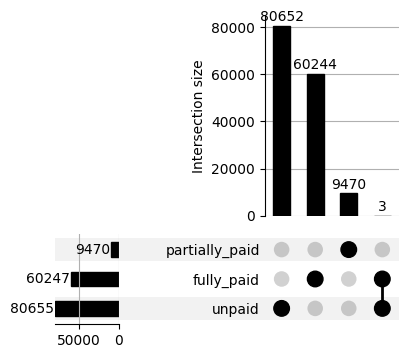

In [28]:
log_view.compare_result_sets(['rs_unpaid', 'rs_is_partially_paid', 'rs_fully_paid'])

We then decide to continue our exploration of _unpaid_ cases by using the union of partially paid and unpaid cases.\
This can be taken with a property or by directly taking the complement set of _fully paid_ cases.

In [29]:
class isPartiallyPaidOrUnPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        # Get the maxium value of attribute amount to include the penalty
        max_amount = log.groupby(case_id_glue)['amount'].max()
        # Get the sum of all postal expenses
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        # Get the maximum value of the amount paid by the offender
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # A fine is paid as long as max(amount) + sum(expense) > max(totalPaymentAmount)
        partially_or_unpaid_fines = to_check[to_check['amount'] + to_check['expense'] > to_check['totalPaymentAmount']]
        case_id_to_keep = partially_or_unpaid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) > max(totalPaymentAmount)'
    
query_is_partially_or_unpaid = Query('unpaid_or_partially', isPartiallyPaidOrUnPaid())
rs_is_partially_or_unpaid, complement_is_partially_or_unpaid = log_view.evaluate_query('unpaid_or_partially', log, query_is_partially_or_unpaid)
log_view.label_result_set(rs_is_partially_or_unpaid, 'unpaid or partially')
_ = log_view.characterize_result_set_with_reference_log(rs_is_partially_or_unpaid, complement_is_partially_or_unpaid, characterizer_name='set-cardinality')

Number of case_id in unpaid_or_partially: 90123
Number of case_id in complement_unpaid_or_partially: 60247


We check for normative outcomes of the process, which we learned from the documentation. In these situations the offender is entitled not to pay.

This query aims to identify cases that have been sent for Credit Collection. In our process, such actions are taken for both unpaid cases and those partially paid. Sending cases for credit collection signifies the initiation of measures to recover outstanding amounts owed by offenders.

In [30]:
_ = log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([isNotPaid()]))

In [31]:
query_scc = Query('sent_credit_collection', EqToConstant('Activity', 'Send for Credit Collection'))
rs_scc, complement_scc = log_view.evaluate_query('rs_scc', rs_is_partially_or_unpaid, query_scc)
log_view.label_result_set(rs_scc, 'unpaid or partially')

In [32]:
_ =log_view.characterize_result_set_with_reference_log(rs_scc, rs_is_partially_or_unpaid, characterizer_name='*')

Sample from unpaid_or_partially
+-------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------+---------------------------+-----------+----------------+
|       | Case ID   | Activity    |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense |   lastSent | lifecycle:transition   |   matricola |   notificationType |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name   | time:timestamp            |   @@index |   @@case_index |
|-------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------

We then want to check for dependencies among queries, to see if unpaid cases correlate with cases sent for credit collection.\
We will use our set _unpaid_or_partially_ and our set _rs_scc_ and compare them.

In [33]:
log_view.compare_two_result_sets(rs_is_partially_or_unpaid,rs_scc)

Result set comparison between q: 'unpaid_or_partially' and r: 'rs_scc'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                59010 |
| q and !r  |                31113 |
| !q and r  |                    0 |
| !q and !r |                    0 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'unpaid_or_partially': max(amount) + sum(expense) > max(totalPaymentAmount) 
	Queries from common ancestor to 'unpaid_or_partially':  
	Queries from common ancestor to 'rs_scc': (Activity in { 'Send for Credit Collection' }) 

Query Dependency Probability:
 query_q --> query_r with 65.477 % query_r --> query_q with 100.000 %


{'intersection-matrix': {'analysis_context': {'query_common_ancestor': <logview.predicate.query.Query at 0x7f8448bf17b0>,
   'query_q': <logview.predicate.query.Query at 0x7f8448bf1000>,
   'query_r': <logview.predicate.query.Query at 0x7f8448bf0760>},
  'intersection_matrix':            Intersection Count
  q and r                 59010
  q and !r                31113
  !q and r                    0
  !q and !r                   0,
  'result_set_positioning': 'query_q --> query_r with 65.477 % query_r --> query_q with 100.000 %'}}

The results show clearly that _rs_scc_ is a subset of _unpaid_or_partially_ and that we have 31113 that are not sent for credit collection.\
Excluding the small amount of cases with initial amount at 0.0, we still have a large number of cases to characterize.

Let's briefly compare the cases sent for credit collection with the set of unpaid cases we found at the beginning, i.e., we leave out partial payments.
We see from the result that query (Activity not in { 'Payment' }) implies query (Activity in { 'Send for Credit Collection' }) and max(amount) + sum(expense) > max(totalPaymentAmount) with a probability of 96.4%, meaning that most of the cases that are sent for credit collection are actually unpaid cases. 

Partially paid cases may be treated differently.

In [34]:
log_view.compare_two_result_sets(rs_no_p, rs_scc)

Result set comparison between q: 'rs_unpaid' and r: 'rs_scc'

Intersection Matrix:
+-----------+----------------------+
|           |   Intersection Count |
|-----------+----------------------|
| q and r   |                56886 |
| q and !r  |                23769 |
| !q and r  |                 2124 |
| !q and !r |                67591 |
+-----------+----------------------+

Analysis Context:
	Query from initial log to common ancestor 'initial_source_log':  
	Queries from common ancestor to 'rs_unpaid': (Activity not in { 'Payment' }) 
	Queries from common ancestor to 'rs_scc': (Activity in { 'Send for Credit Collection' }) and max(amount) + sum(expense) > max(totalPaymentAmount) 

Query Dependency Probability:
 query_q --> query_r with 70.530 % query_r --> query_q with 96.401 %


{'intersection-matrix': {'analysis_context': {'query_common_ancestor': <logview.predicate.query.Query at 0x7f8448bf2830>,
   'query_q': <logview.predicate.query.Query at 0x7f8448bf0400>,
   'query_r': <logview.predicate.query.Query at 0x7f8448bf19f0>},
  'intersection_matrix':            Intersection Count
  q and r                 56886
  q and !r                23769
  !q and r                 2124
  !q and !r               67591,
  'result_set_positioning': 'query_q --> query_r with 70.530 % query_r --> query_q with 96.401 %'}}

This query targets cases concluding with the issuance of fines, specifically those ending with *Send Fine*.\
According to our documented process, if fines are not created and sent within 90 days, offenders are not obliged to pay. Here we start checking for cases ending with Send Fine

In [35]:
query_ends_with_send_fine = Query('ends_with_send_fine', EndWith('Send Fine'))
rs_ends_with_send_fine, complement_ends_with_send_fine = log_view.evaluate_query('rs_ends_with_send_fine', rs_is_partially_or_unpaid, query_ends_with_send_fine)
log_view.label_result_set(rs_ends_with_send_fine, 'unpaid or partially')

In [36]:
_ =log_view.characterize_result_set_with_reference_log(rs_ends_with_send_fine, rs_is_partially_or_unpaid, characterizer_name='*')

Sample from unpaid_or_partially
+--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                   |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name               | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+----------------------------+------------+---------------------------+-----------+-----------------+--

This query focuses on cases marked for dismissal, denoted by '#' (dismissal by the prefecture) or 'G' (dismissal by the judge). 

In [37]:
query_dismissed = Query('dismissed', EqToConstant('dismissal', ['#', 'G']))
rs_dismissed, complement_dismissed = log_view.evaluate_query('rs_dismissed', rs_is_partially_or_unpaid, query_dismissed)
log_view.label_result_set(rs_dismissed, 'unpaid or partially')
log_view.label_result_set(rs_dismissed, 'src:unpaid_or_partially')


In [38]:
_ =log_view.characterize_result_set_with_reference_log(rs_dismissed, rs_is_partially_or_unpaid, characterizer_name='*')

Sample from unpaid_or_partially
+--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+----------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity    |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense |   lastSent | lifecycle:transition   |   matricola |   notificationType |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name   | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+-------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+---------

We then decide to plot the main result sets we obtained by analyzing the unpaid_or_partially set. To do so, we use the label 'unpaid or partially', which we gave to all the result sets having these payment outcomes.
The UpSet plot shows the result sets ordered by cardinality and the proportion of the result sets where the query predicates hold alone or in overlap.

+----+------------------------+------------------------------------------------------+
|    | query name             | predicates                                           |
|----+------------------------+------------------------------------------------------|
|  0 | unpaid_or_partially    | max(amount) + sum(expense) > max(totalPaymentAmount) |
|  1 | sent_credit_collection | (Activity in { 'Send for Credit Collection' })       |
|  2 | ends_with_send_fine    | (EndWith { 'Send Fine' })                            |
|  3 | dismissed              | (dismissal in { '#', 'G' })                          |
+----+------------------------+------------------------------------------------------+


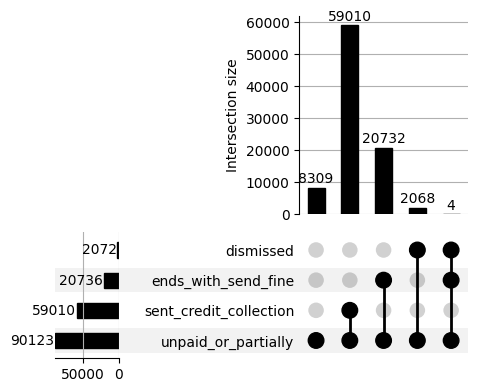

In [39]:
log_view.compare_result_sets_with_label('unpaid or partially')

From the plot, we see that 8309 cases in the unpaid or partially paid set are not covered by the normative outcomes we checked for.\
These might be cases where offenders actually needed to pay but did not. We then go deep into this set of cases, which we call _R_.

In [40]:
# take the union of the three subqueries
union_queries = Query("union_queries", Union([query_scc, query_ends_with_send_fine, query_dismissed]))
# derive the result set and the complement
union_queries, R = log_view.evaluate_query('union_queries', rs_is_partially_or_unpaid, union_queries)
# check the cardinality of the complement to ensure it matches the UpSet Plot
_ = log_view.characterize_result_set_with_reference_log(union_queries, R, characterizer_name='set-cardinality')

Number of case_id in union_queries: 81814
Number of case_id in complement_union_queries: 8309


We checked the normative constraint of 90 days between Create Fine and Send Fine, discovering that 47% of the cases in _R_ do not observe it.

In [41]:
class DistanceBetweenEvents(Predicate):

    def __init__(self, activity_a: str, activity_b: str, seconds: int):
        self.activity_a = activity_a
        self.activity_b = activity_b
        self.seconds = seconds

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        return pm4py.filter_paths_performance(log, (self.activity_a, self.activity_b), 0, self.seconds)

    def as_string(self) -> str:
        return f'{self.activity_a} <--> {self.activity_b} with {self.seconds}'

In [42]:
query_90_days = Query('90_days_constraint', DistanceBetweenEvents('Create Fine', 'Send Fine', 90 * 86400))
rs_90_days, complement_90_days = log_view.evaluate_query('rs_90_days', R, query_90_days)
log_view.label_result_set(rs_90_days, label='src:R')

rs_90_days.head(20)


,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
1364,A10581,Create Fine,557,2007-05-27 00:00:00+00:00,Variant 4,4,22.0,7.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A10581,Create Fine,2007-05-27 00:00:00+00:00,1364,381
1365,A10581,Send Fine,NaN,2007-08-20 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A10581,Send Fine,2007-08-20 00:00:00+00:00,1365,381
1366,A10581,Insert Fine Notification,NaN,2007-08-29 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A10581,Insert Fine Notification,2007-08-29 00:00:00+00:00,1366,381
1367,A10581,Add penalty,NaN,2007-10-28 00:00:00+00:00,Variant 4,4,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A10581,Add penalty,2007-10-28 00:00:00+00:00,1367,381
1368,A10581,Payment,NaN,2007-10-31 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,NaN,35.0,NaN,35.0,NaN,A10581,Payment,2007-10-31 00:00:00+00:00,1368,381
3745,A11664,Create Fine,537,2007-05-01 00:00:00+00:00,Variant 4,4,36.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A11664,Create Fine,2007-05-01 00:00:00+00:00,3745,1097
3746,A11664,Send Fine,NaN,2007-07-17 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,A11664,Send Fine,2007-07-17 00:00:00+00:00,3746,1097
3747,A11664,Insert Fine Notification,NaN,2007-07-24 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A11664,Insert Fine Notification,2007-07-24 00:00:00+00:00,3747,1097
3748,A11664,Add penalty,NaN,2007-09-22 00:00:00+00:00,Variant 4,4,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A11664,Add penalty,2007-09-22 00:00:00+00:00,3748,1097
3749,A11664,Payment,NaN,2007-09-24 00:00:00+00:00,Variant 4,4,NaN,NaN,NaN,NaN,...,NaN,49.0,NaN,49.0,NaN,A11664,Payment,2007-09-24 00:00:00+00:00,3749,1097


In [43]:
_ = log_view.characterize_result_set_with_reference_log(rs_90_days, R, characterizer_name='set-cardinality')

log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([DistanceBetweenEvents('Create Fine', 'Send Fine', 90 * 86400)]))
_ = log_view.characterize_result_set_with_reference_log(R, rs_is_partially_or_unpaid, characterizer_name='property_evaluator')

Number of case_id in rs_90_days: 4381
Number of case_id in complement_union_queries: 8309
+-----------------------------------------+----------------------------+-----------------------+
|                                         | complement_union_queries   | unpaid_or_partially   |
|-----------------------------------------+----------------------------+-----------------------|
| Create Fine <--> Send Fine with 7776000 | (4381, 0.527)              | (46841, 0.52)         |
+-----------------------------------------+----------------------------+-----------------------+


We check the same property on the entire log (divided into _fully paid_ cases and _unpaid_or_partially_ paid ones), to have an estimate of cases in which the offender might not need to pay their fines.

In [44]:
log_view.attach_result_set_characterizer('property_evaluator', PropertiesEvaluator([DistanceBetweenEvents('Create Fine', 'Send Fine', 90 * 86400)]))
_ = log_view.characterize_result_set_with_reference_log(rs_is_partially_or_unpaid, rs_fully_paid, characterizer_name='property_evaluator')

+-----------------------------------------+-----------------------+-----------------+
|                                         | unpaid_or_partially   | rs_fully_paid   |
|-----------------------------------------+-----------------------+-----------------|
| Create Fine <--> Send Fine with 7776000 | (46841, 0.52)         | (6945, 0.115)   |
+-----------------------------------------+-----------------------+-----------------+


We continue with characterizing R, adjusting the payment threshold, and leaving a tolerance of 10 Euros for offenders to pay their fines.

In [45]:
class IsPaidwithThreshold(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        max_amount = log.groupby(case_id_glue)['amount'].max()
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # a fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] + to_check['expense'] - 10 <= (to_check['totalPaymentAmount'])]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return 'max(amount) + sum(expense) - 10 <= (max(totalPaymentAmount))'
    
query_threshold = Query('paid_within_10', [IsPaidwithThreshold()])
rs_within10, complement_within10 = log_view.evaluate_query('rs_paid_within_10', R, query_threshold)
log_view.label_result_set(rs_within10, label='src:R')
    

In [46]:
_ = log_view.characterize_result_set_with_reference_log(rs_within10, R, characterizer_name='*')

Sample from complement_union_queries
+--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+--------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                 |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name             | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+-------

At last, we continue examining these differences between paid amounts and actual amounts to pay with some selected properties, going deep into complements of the result sets that we cannot explain with the exsiting properties.

In [47]:
class OnlyFineAndExpense(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        log = log[log['Activity'] != 'Add penalty']
        max_amount = log.groupby(case_id_glue)['amount'].max()
        sum_expenses = log.groupby(case_id_glue)['expense'].sum()
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, sum_expenses, max_totalPaymentAmount], axis=1)

        # a fine is paid as long as max(amount) + sum(expense) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] + to_check['expense'] <= (to_check['totalPaymentAmount'])]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return f'max(amount) + sum(expense) <= max(totalPaymentAmount)'


query_only_fine_and_expense = Query('only_fine_and_expense', OnlyFineAndExpense())
rs_only_fine_and_expense, complement_only_fine_and_expense = log_view.evaluate_query('rs_only_fine_and_expense', R, query_only_fine_and_expense)
log_view.label_result_set(rs_only_fine_and_expense, label='src:R')


In [48]:
_ = log_view.characterize_result_set_with_reference_log(rs_only_fine_and_expense, complement_only_fine_and_expense, characterizer_name='random-example-retriever')
_ = log_view.characterize_result_set_with_reference_log(rs_only_fine_and_expense, complement_only_fine_and_expense, characterizer_name='summary-statistics')

Sample from rs_only_fine_and_expense
+--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+--------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                 |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name             | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+-------

In [51]:
class OnlyFine(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'

        log = log[log['Activity'] != 'Add penalty']
        max_amount = log.groupby(case_id_glue)['amount'].max()
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()

        to_check = pd.concat([max_amount, max_totalPaymentAmount], axis=1)

        # a fine is paid as long as max(amount) <= max(totalPaymentAmount)
        paid_fines = to_check[to_check['amount'] <= (to_check['totalPaymentAmount'])]
        case_id_to_keep = paid_fines['amount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return f'max(amount) <= max(totalPaymentAmount)'
    
query_only_fine = Query('only_fine', OnlyFine())
rs_only_fine, complement_only_fine = log_view.evaluate_query('rs_only_fine', complement_only_fine_and_expense, query_only_fine)
_ = log_view.characterize_result_set_with_reference_log(rs_only_fine, complement_only_fine, characterizer_name='set-cardinality')

Number of case_id in rs_only_fine: 958
Number of case_id in complement_rs_only_fine: 1382


In [52]:
_ = log_view.characterize_result_set_with_reference_log(rs_only_fine, complement_only_fine, characterizer_name='random-example-retriever')

Sample from rs_only_fine
+--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+-----------+-------------+-----------+------------+------------------------+-------------+--------------------+-----------------+----------+----------------------+----------------+---------------------+--------------------------+---------------------------+-----------+----------------+
|        | Case ID   | Activity                 |   Resource | Complete Timestamp        | Variant   |   Variant index |   amount |   article | dismissal   |   expense | lastSent   | lifecycle:transition   |   matricola | notificationType   |   paymentAmount |   points |   totalPaymentAmount | vehicleClass   | case:concept:name   | concept:name             | time:timestamp            |   @@index |   @@case_index |
|--------+-----------+--------------------------+------------+---------------------------+-----------+-----------------+----------+--------

In [54]:
class NeverPaid(Predicate):

    def evaluate(self, log: pd.DataFrame) -> pd.DataFrame:
        case_id_glue = 'case:concept:name'
        max_totalPaymentAmount = log.groupby(case_id_glue)['totalPaymentAmount'].max()
        to_check = pd.concat([max_totalPaymentAmount], axis=1)

        paid_fines = to_check[to_check['totalPaymentAmount'] == 0.0]
        case_id_to_keep = paid_fines['totalPaymentAmount'].index
        return log[log[case_id_glue].isin(case_id_to_keep)]

    def as_string(self) -> str:
        return f'max(totalPaymentAmount) == 0.0'

query_never_paid = Query('never_paid', NeverPaid())
rs_never_paid, complement_never_paid = log_view.evaluate_query('rs_never_paid', complement_only_fine, query_never_paid)
_ = log_view.characterize_result_set_with_reference_log(rs_never_paid, complement_never_paid, characterizer_name='set-cardinality')


Number of case_id in rs_never_paid: 1306
Number of case_id in complement_rs_never_paid: 76


In [55]:
_ = log_view.get_summary()

+----+-------------------------------------+------------------------+--------------------------+----------------------------------------------------+
|    | source_log                          | query                  | result_set               | labels                                             |
|----+-------------------------------------+------------------------+--------------------------+----------------------------------------------------|
|  0 | initial_source_log                  | unpaid                 | rs_unpaid                | ['unpaid']                                         |
|  1 | complement_rs_unpaid                | p_not_paid             | rs_p_unpaid              | ['unpaid']                                         |
|  2 | initial_source_log                  | amount_zero            | rs_amount_zero           | ['src:log']                                        |
|  3 | initial_source_log                  | fully_paid             | rs_fully_paid            | ['s

+----+-----------------------+--------------------------------------------------------------+
|    | query name            | predicates                                                   |
|----+-----------------------+--------------------------------------------------------------|
|  0 | 90_days_constraint    | Create Fine <--> Send Fine with 7776000                      |
|  1 | paid_within_10        | max(amount) + sum(expense) - 10 <= (max(totalPaymentAmount)) |
|  2 | only_fine_and_expense | max(amount) + sum(expense) <= max(totalPaymentAmount)        |
+----+-----------------------+--------------------------------------------------------------+


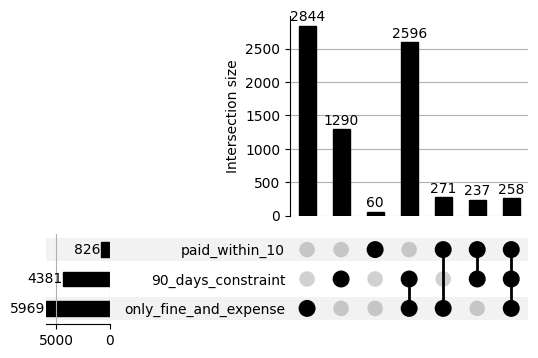

In [56]:
log_view.compare_result_sets_with_label(requested_label='src:R')